In [2]:
# Import necessary libraries
%matplotlib inline
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

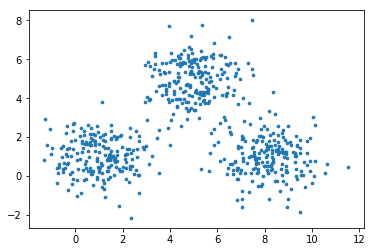

In [3]:
# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

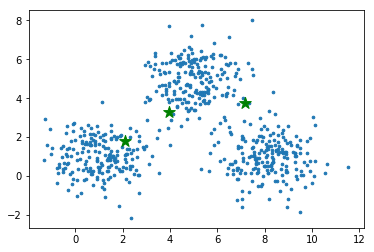

In [4]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [5]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[ 1.02315651,  0.99655598],
       [ 7.65494771,  2.03221711],
       [ 4.47228455,  4.69950101]])

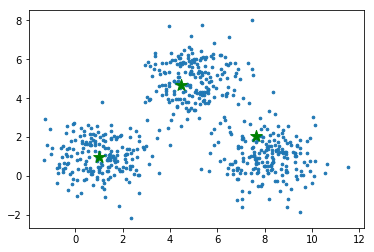

In [6]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

# IRIS

In [7]:
df = pd.read_csv("Iris.csv") #load the dataset
df.drop('Id',axis=1,inplace=True) # Se elimina la columna no requerida

In [8]:
# Change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
category = df.values[:, 4]

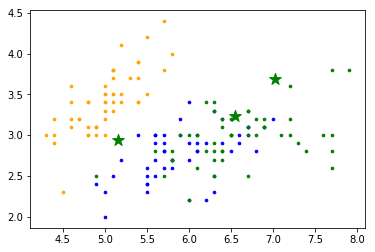

In [9]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [10]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new  

array([[ 5.47222222,  2.64444444,  4.4       ,  1.58333333],
       [ 5.9175    ,  3.03083333,  3.85      ,  1.22083333],
       [ 5.65833333,  3.9       ,  1.88333333,  0.4       ]])

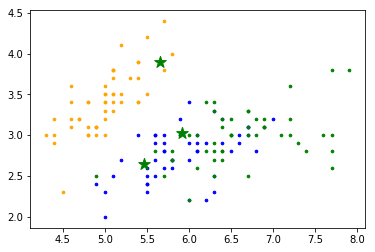

In [11]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)